<a href="https://colab.research.google.com/github/Adam129511/sieci2/blob/main/Sie%C4%87_konwolucyjna.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Konwolucyjna Sieć Neuronowa - MNIST

In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [3]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

print('Liczba danych treningowych:{}'.format (x_train.shape[0]))
print('Liczba danych testowych:', x_test.shape[0])
print('Rozmiar pojedynczego obrazka:{}'.format (x_train[0].shape))

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)
Liczba danych treningowych:60000
Liczba danych testowych: 10000
Rozmiar pojedynczego obrazka:(28, 28)


(-0.5, 27.5, 27.5, -0.5)

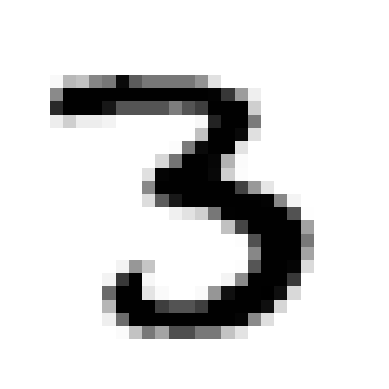

In [4]:
import matplotlib.pyplot as plt
plt.imshow(x_train[12],cmap='Greys')
plt.axis('off')

In [5]:
print(keras.backend.image_data_format()) #Prezentuje format zapisu danych

channels_last


In [6]:
img_rows, img_cols = 28,28 #Ustawienie formatu
if keras.backend.image_data_format() == 'channel_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

print(input_shape)

(28, 28, 1)


Standaryzacja danych

In [7]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_test /= 255
x_train /= 255

print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [8]:
y_train = keras.utils.to_categorical(y_train, num_classes= 10)
y_test = keras.utils.to_categorical(y_test, num_classes= 10)

print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


In [9]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

Budowa Modelu

In [10]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size=(3,3), activation = 'relu', input_shape = (28, 28, 1) ))
model.add(Conv2D(filters = 64, kernel_size=(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(units=128, activation = 'relu'))
model.add(Dense(units=10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                        

In [11]:
model.compile(optimizer='adadelta',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'] )

In [12]:
history = model.fit(x_train, y_train, batch_size = 128, epochs=20, validation_data = (x_test, y_test))

Epoch 1/20
469/469 [==============================] - 15s 8ms/step - loss: 2.2531 - accuracy: 0.3073 - val_loss: 2.2101 - val_accuracy: 0.4480
Epoch 2/20
469/469 [==============================] - 3s 7ms/step - loss: 2.1572 - accuracy: 0.5254 - val_loss: 2.0899 - val_accuracy: 0.5822
Epoch 3/20
469/469 [==============================] - 4s 8ms/step - loss: 2.0012 - accuracy: 0.6242 - val_loss: 1.8811 - val_accuracy: 0.6665
Epoch 4/20
469/469 [==============================] - 3s 7ms/step - loss: 1.7300 - accuracy: 0.6946 - val_loss: 1.5310 - val_accuracy: 0.7380
Epoch 5/20
469/469 [==============================] - 4s 8ms/step - loss: 1.3426 - accuracy: 0.7526 - val_loss: 1.1226 - val_accuracy: 0.7936
Epoch 6/20
469/469 [==============================] - 4s 7ms/step - loss: 0.9919 - accuracy: 0.7945 - val_loss: 0.8363 - val_accuracy: 0.8255
Epoch 7/20
469/469 [==============================] - 3s 7ms/step - loss: 0.7749 - accuracy: 0.8188 - val_loss: 0.6746 - val_accuracy: 0.8417
Epoch

In [14]:
def make_accuracy_plot(history):
     #Funkcja zwraca wykres dokładośći (accuracy) modelu na zbiorze treningowym i walidacyjnym
    import matplotlib.pyplot as plt
    import seaborn as sns
    sns.set()
    acc, val_acc = history.history['accuracy'], history.history['val_accuracy']
    epochs = range(1, len(acc)+1)

    plt.figure(figsize = (10,8))
    plt.plot(epochs, acc, label = "dokładność trenowania", marker = 'o')
    plt.plot(epochs, val_acc, label = "dokładność walidacji", marker = 'o')
    plt.legend()
    plt.title('Dokładność trenowania i walidacji')
    plt.xlabel('epoki')
    plt.ylabel('Dokładność')
    plt.show()

def make_loss_plot(history): #Funkcja zwraca wykres straty (loss) na zbiorze treningowym i walidacyjnym
    import matplotlib.pyplot as plt
    import seaborn as sns
    sns.set()
    loss, val_loss = history.history['loss'], history.history['val_loss']
    epochs= range(1, len(loss)+1)

    plt.figure(figsize = (10,8))
    plt.plot(epochs, loss, label = "Strata trenowania", marker = 'o')
    plt.plot(epochs, val_loss, label = "Strata walidacji", marker = 'o')
    plt.legend()
    plt.title('Strata trenowania i walidacji')
    plt.xlabel('epoki')
    plt.ylabel('Strata')
    plt.show()


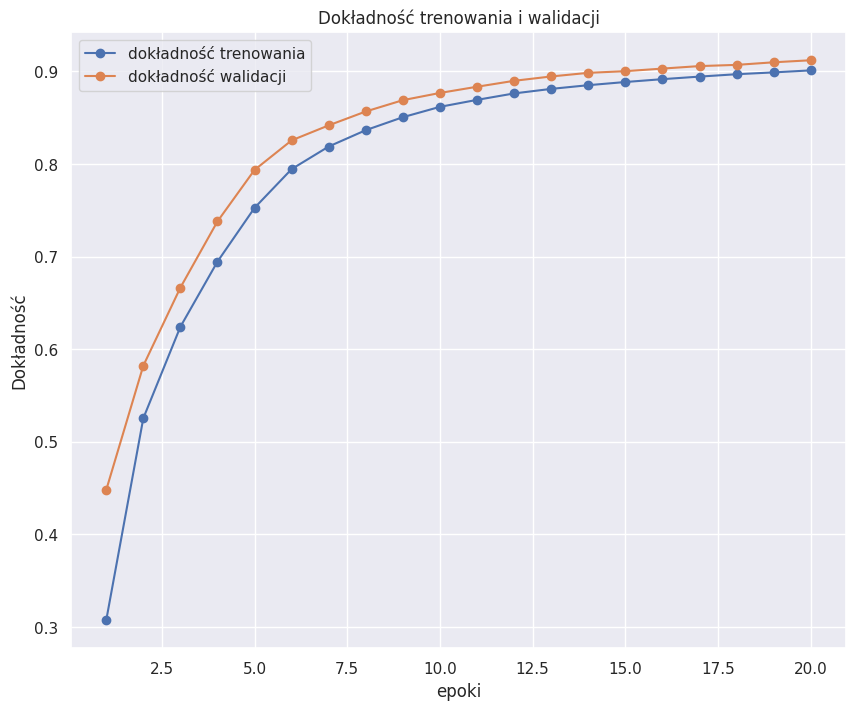

In [16]:
make_accuracy_plot(history)

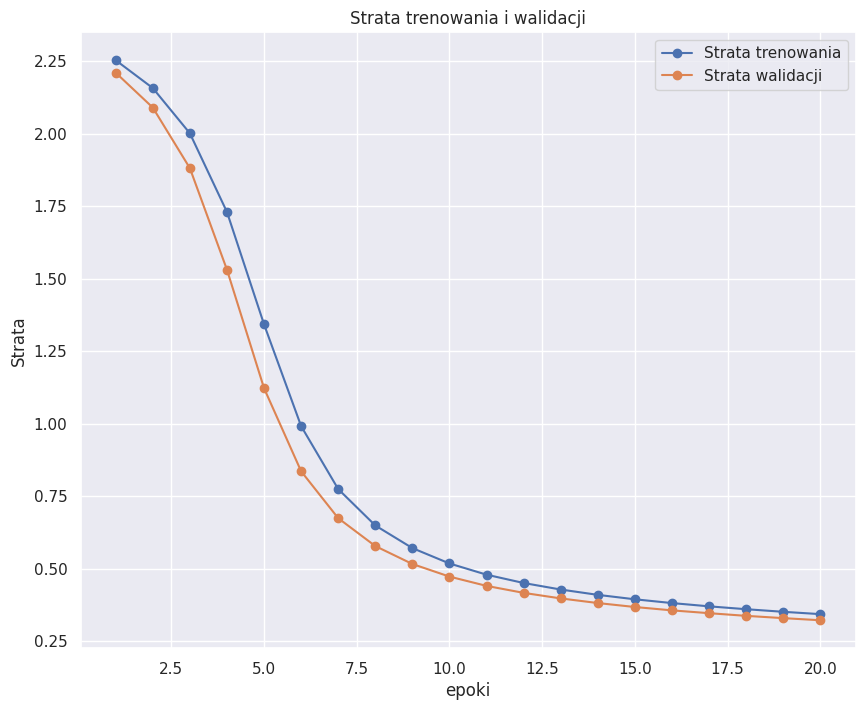

In [17]:
make_loss_plot(history)